In [1]:
import numpy as np
import random

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn import svm

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, confusion_matrix

In [2]:
# we will load digits from dataset
dig_data = datasets.load_digits()

print(dig_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:


#length of dataset(no.of rows)
print("Total Cases : ", len(dig_data.images))

#column names
print(dig_data.keys())

#all targets
print(dig_data.target)

#allowed targets
print("Allowed targets : ", *dig_data.target_names)

Total Cases :  1797
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[0 1 2 ... 8 9 8]
Allowed targets :  0 1 2 3 4 5 6 7 8 9


In [4]:
# len of dat set
digits = dig_data.images.reshape((len(dig_data.images), -1))

#
digits.shape

(1797, 64)

Text(0.5, 1.0, 'Hand Written Digit')

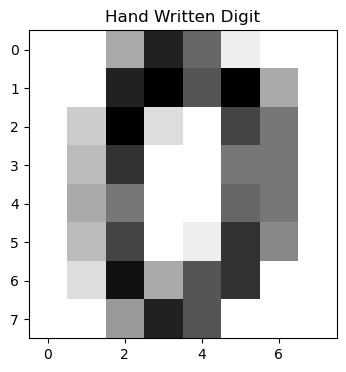

In [5]:
# Visualization of first Image
plt.figure(figsize=(4, 4))
plt.imshow(dig_data.images[0], interpolation = "nearest", cmap = plt.cm.gray_r)
plt.title("Hand Written Digit")

In [6]:
# split the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(digits, dig_data.target, 
                                        train_size = 0.7, random_state=1)


In [7]:
#
model = svm.SVC(C = 10.0, gamma = 0.001)
#model training
model.fit(x_train, y_train)

#model testing
score = model.score(x_test, y_test)
print(score)
#accuracy
accuracy_score(y_test, model.predict(x_test))

0.9907407407407407


0.9907407407407407

In [8]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Model Performance:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


In [9]:
# Perform cross-validation
cv_scores = cross_val_score(model, digits, dig_data.target, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.97777778 0.95       0.98328691 0.98607242 0.9637883 ]
Average cross-validation score: 0.972185082017951
